In [1]:
import torch
import torch.nn as nn
import torch.nn.functional as F   
import torch.optim as optim
from torchvision import datasets, transforms
from torch.utils.data import DataLoader
import matplotlib.pyplot as plt


In [2]:
transform = transforms.Compose(
    [transforms.ToTensor()]
)

In [3]:
cifar10 = datasets.CIFAR10('./', transform=transform, download=True)

Files already downloaded and verified


In [4]:
traindataloader = DataLoader(cifar10, batch_size=50, shuffle=True)

# image size 3, 32, 32

In [5]:
def generate_noise(num, device='cpu'):
  out = torch.rand(num, 26, 1, 1).to(device)
  return out

def same_padding(kernel_size):
  import math
  return math.floor((kernel_size - 1) / 2)


In [6]:
class Generator(nn.Module):
  def __init__(self):
    super(Generator, self).__init__()
    self.layer1 = self.gen_block(26, 52)
    self.layer2 = self.gen_block(52, 52)
    self.layer3 = self.gen_block(52, 20)
    self.layer4 = self.gen_block(20, 5)
    self.layer5 = self.gen_block(5, 3, final_layer = True)
    
  def gen_block(self, input_channel, output_channel, kernel_size = 3, final_layer = False):
    if not final_layer:
      return nn.Sequential(
          nn.UpsamplingBilinear2d(scale_factor=2),
          nn.Conv2d(input_channel, input_channel, kernel_size=kernel_size, padding=same_padding(kernel_size)),
          nn.LeakyReLU(0.2),
          nn.BatchNorm2d(input_channel),
          nn.Conv2d(input_channel, output_channel, kernel_size=kernel_size, padding=same_padding(kernel_size)),
          nn.LeakyReLU(0.2),
          nn.BatchNorm2d(output_channel)
      )
    else:
      return nn.Sequential(
          nn.UpsamplingBilinear2d(scale_factor=2),
          nn.Conv2d(input_channel, output_channel, kernel_size=kernel_size, padding=same_padding(kernel_size)),
          nn.Sigmoid()
      )


  def forward(self, x):
    x = self.layer1(x)
    x = self.layer2(x)
    x = self.layer3(x)
    x = self.layer4(x)
    x = self.layer5(x)
    return x

In [7]:
class Discriminator(nn.Module):
  def __init__(self):
    super(Discriminator, self).__init__()
    self.layer1 = self.get_dis_block(3, 10)
    self.layer2 = self.get_dis_block(10, 20)
    self.layer3 = self.get_dis_block(20, 40)
    self.layer5 = self.get_dis_block(40, 10)
    self.maxpool = nn.MaxPool2d(2)
    self.flatten = nn.Flatten()
    self.linear1 = nn.Linear(40, 1)
    self.sigmoid = nn.Sigmoid()
  
  def get_dis_block(self, input_channel, output_channel, kernel_size=3):
    return nn.Sequential(
        nn.Conv2d(input_channel, output_channel, kernel_size=kernel_size, padding=same_padding(kernel_size)),
        nn.LeakyReLU(0.2),
        nn.BatchNorm2d(output_channel),

    )
    
  
  def forward(self, x):
    x = self.layer1(x)
    x = self.maxpool(x)
    x = self.layer2(x)
    x = self.maxpool(x)
    x = self.layer3(x)
    x = self.maxpool(x)
    x = self.maxpool(x)
    x = self.layer5(x)
    x = self.flatten(x)
    x = self.linear1(x)
    out = self.sigmoid(x)
    return out

In [8]:
mse = nn.MSELoss()
epochs = 50
device = 'cuda:0' if torch.cuda.is_available() else 'cpu'

Gen = Generator().to(device)
Dis = Discriminator().to(device)

optimG = optim.Adam(Gen.parameters(), lr=0.0002)
optimD = optim.Adam(Dis.parameters(), lr=0.0001)
print(device)


cuda:0


In [9]:
def display_block_img(images, num=5, size=(100, 100)):
  from torchvision.utils import make_grid
  image_detach = images.detach().cpu()
  image_grid = make_grid(image_detach[:num], nrow=5)
  plt.figure(figsize=size)
  plt.imshow(image_grid.permute(1, 2, 0).squeeze())
  plt.show()


Epoch 1 finished
0.5134570002555847 loss for discriminator
0.24417708814144135 loss for generator


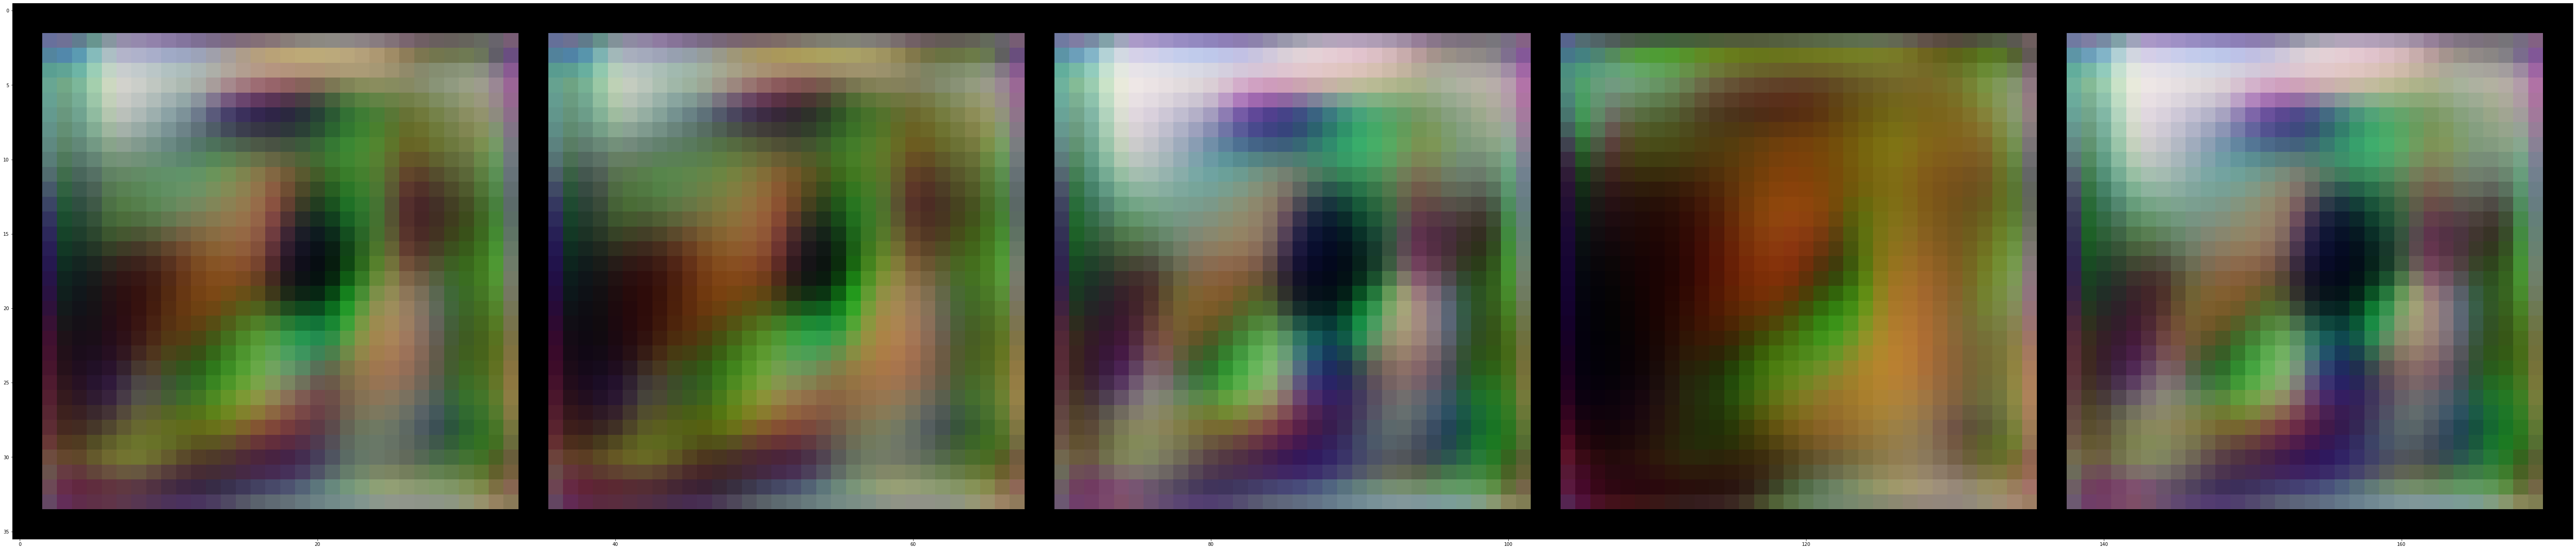

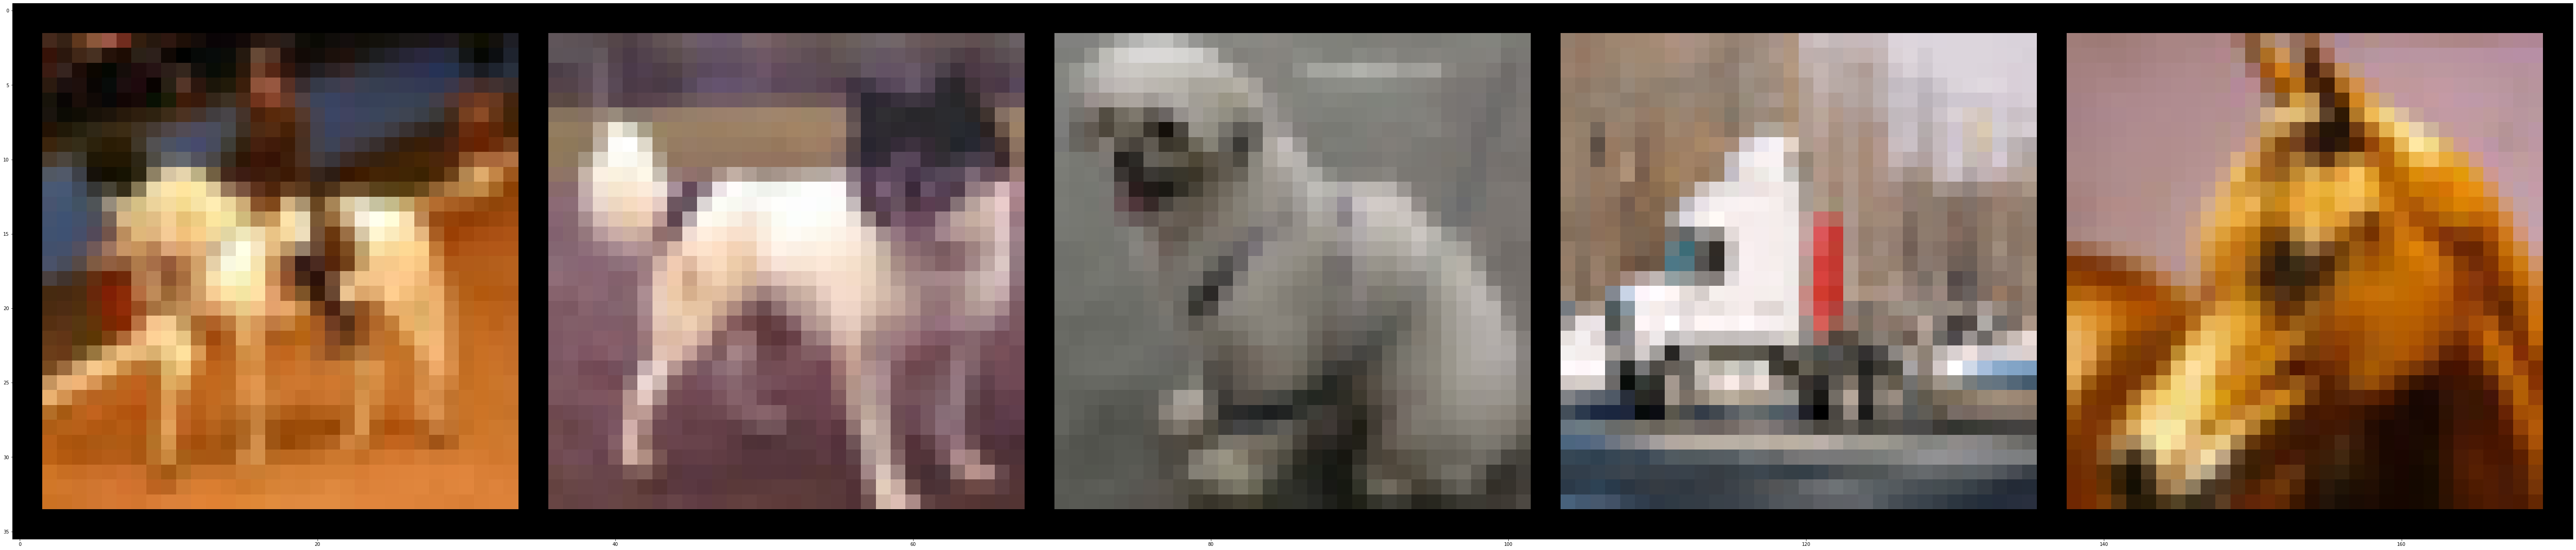

Epoch 2 finished
0.516319751739502 loss for discriminator
0.24900107085704803 loss for generator
Epoch 3 finished
0.5069419741630554 loss for discriminator
0.243000790476799 loss for generator
Epoch 4 finished
0.4963012933731079 loss for discriminator
0.25421142578125 loss for generator
Epoch 5 finished
0.43191975355148315 loss for discriminator
0.33175671100616455 loss for generator
Epoch 6 finished
0.20146924257278442 loss for discriminator
0.6718990802764893 loss for generator


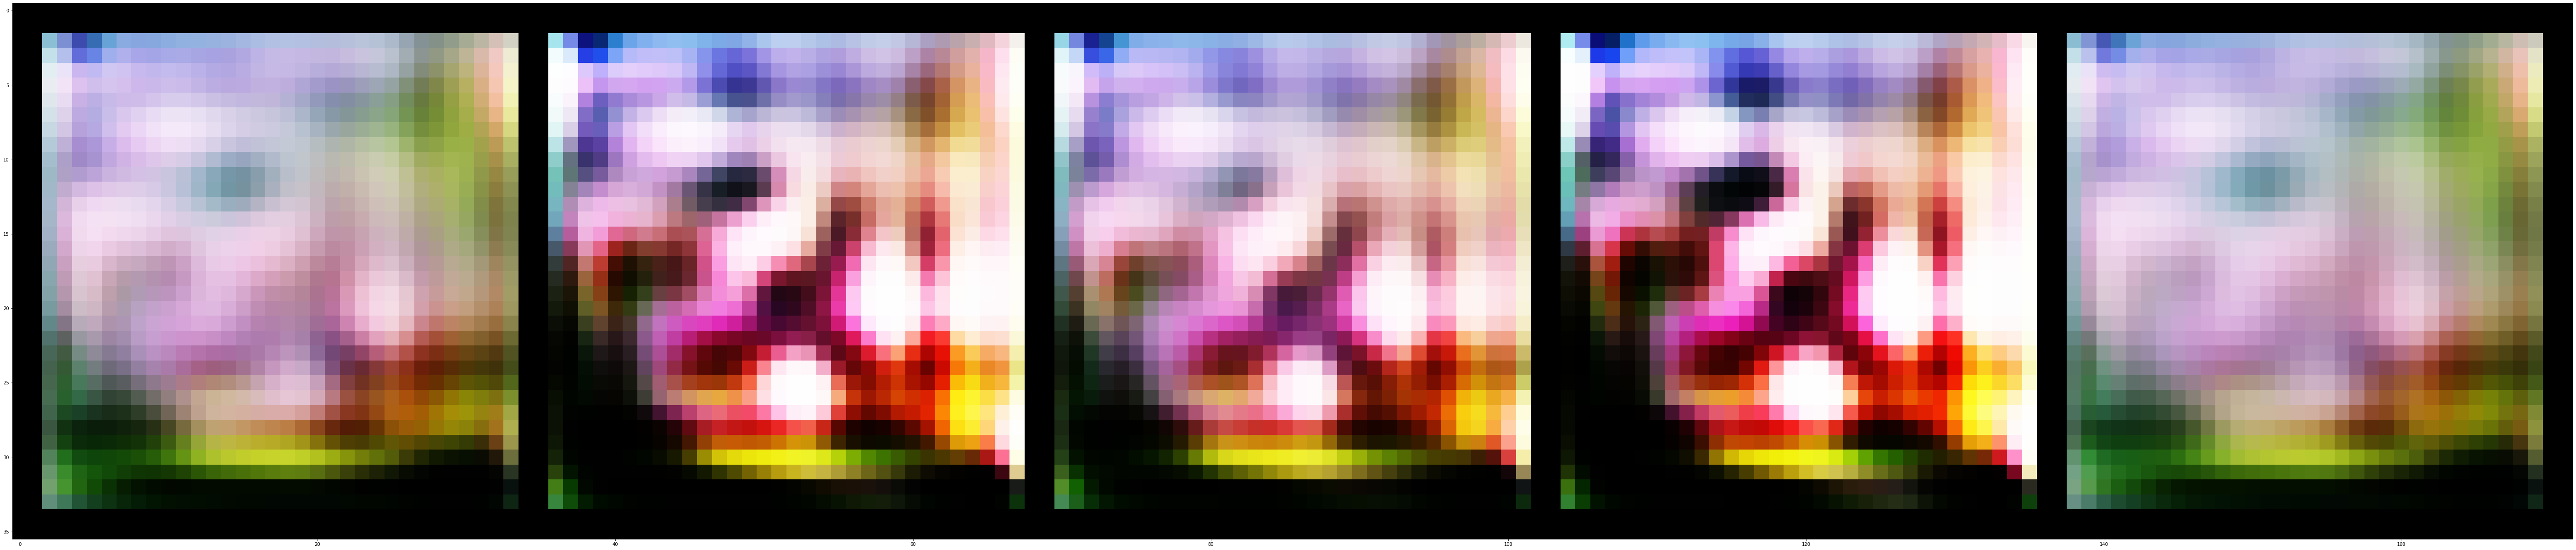

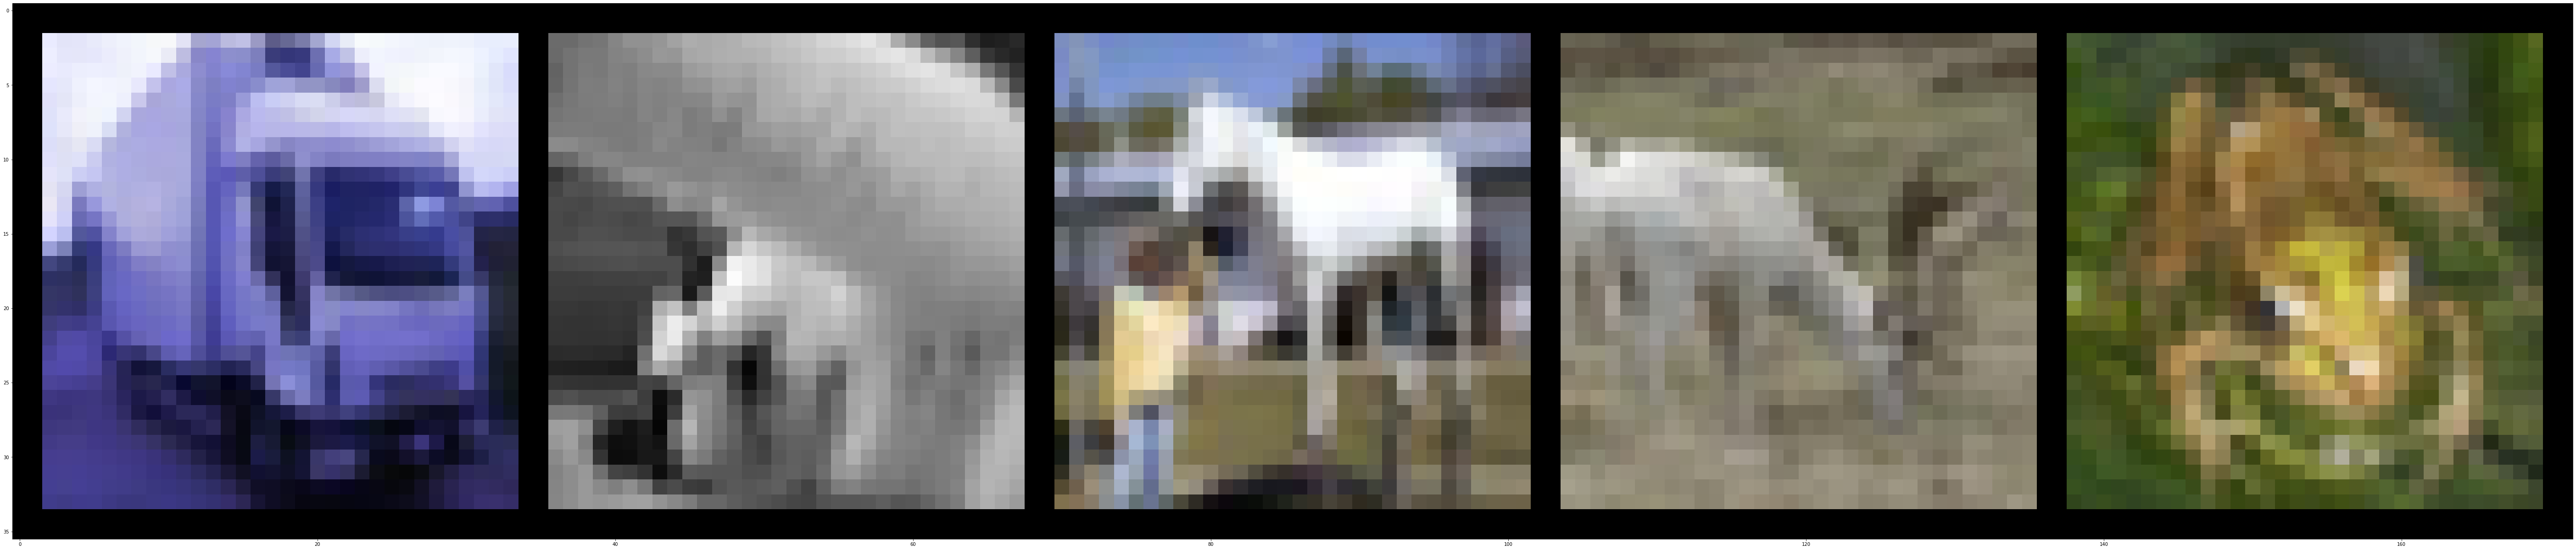

Epoch 7 finished
0.07119818776845932 loss for discriminator
0.7435490489006042 loss for generator
Epoch 8 finished
0.00561562879011035 loss for discriminator
0.9025748372077942 loss for generator
Epoch 9 finished
0.15618190169334412 loss for discriminator
0.7620435357093811 loss for generator
Epoch 10 finished
0.06100631505250931 loss for discriminator
0.7961055040359497 loss for generator
Epoch 11 finished
0.008499404415488243 loss for discriminator
0.883518636226654 loss for generator


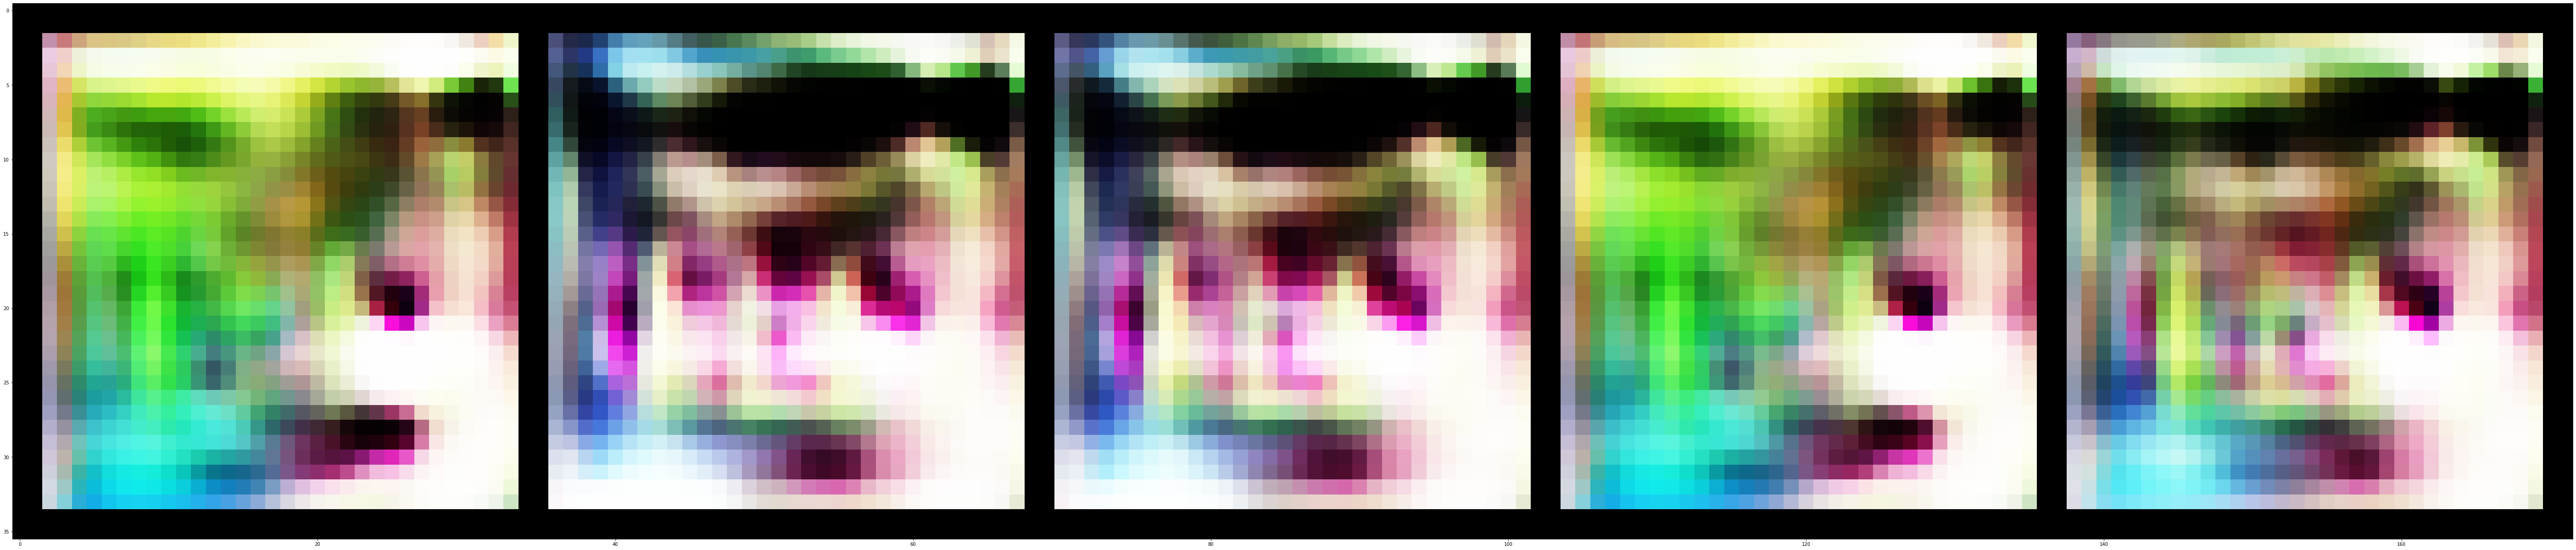

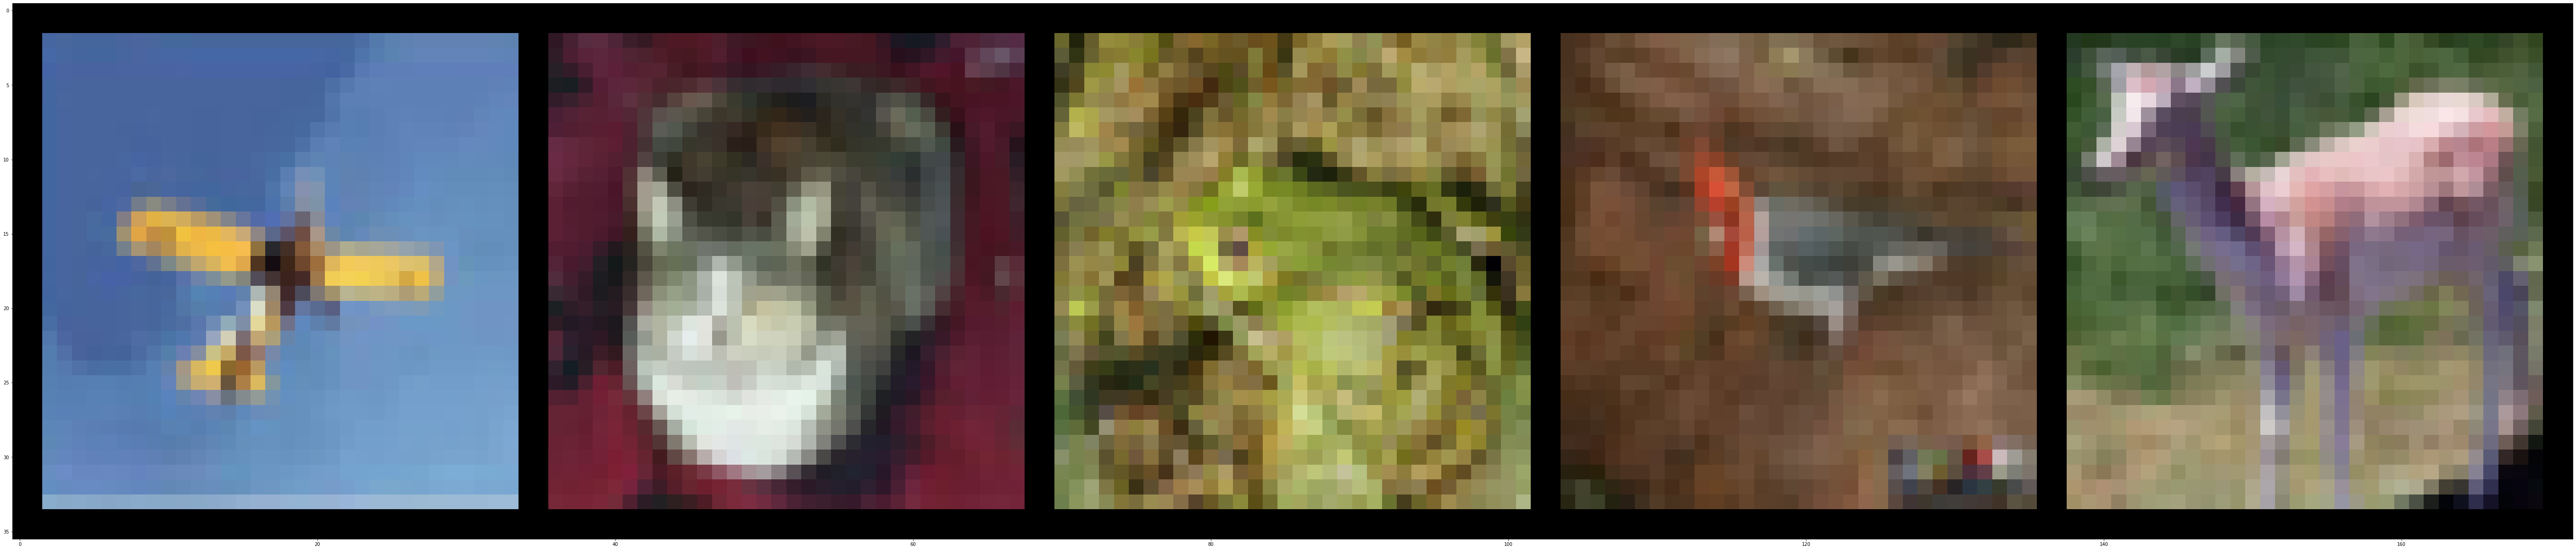

Epoch 12 finished
0.0472562201321125 loss for discriminator
0.7934005856513977 loss for generator
Epoch 13 finished
0.31878748536109924 loss for discriminator
0.6437162756919861 loss for generator
Epoch 14 finished
0.3762275278568268 loss for discriminator
0.33335059881210327 loss for generator
Epoch 15 finished
0.532167911529541 loss for discriminator
0.3961910903453827 loss for generator
Epoch 16 finished
0.44123637676239014 loss for discriminator
0.45493701100349426 loss for generator


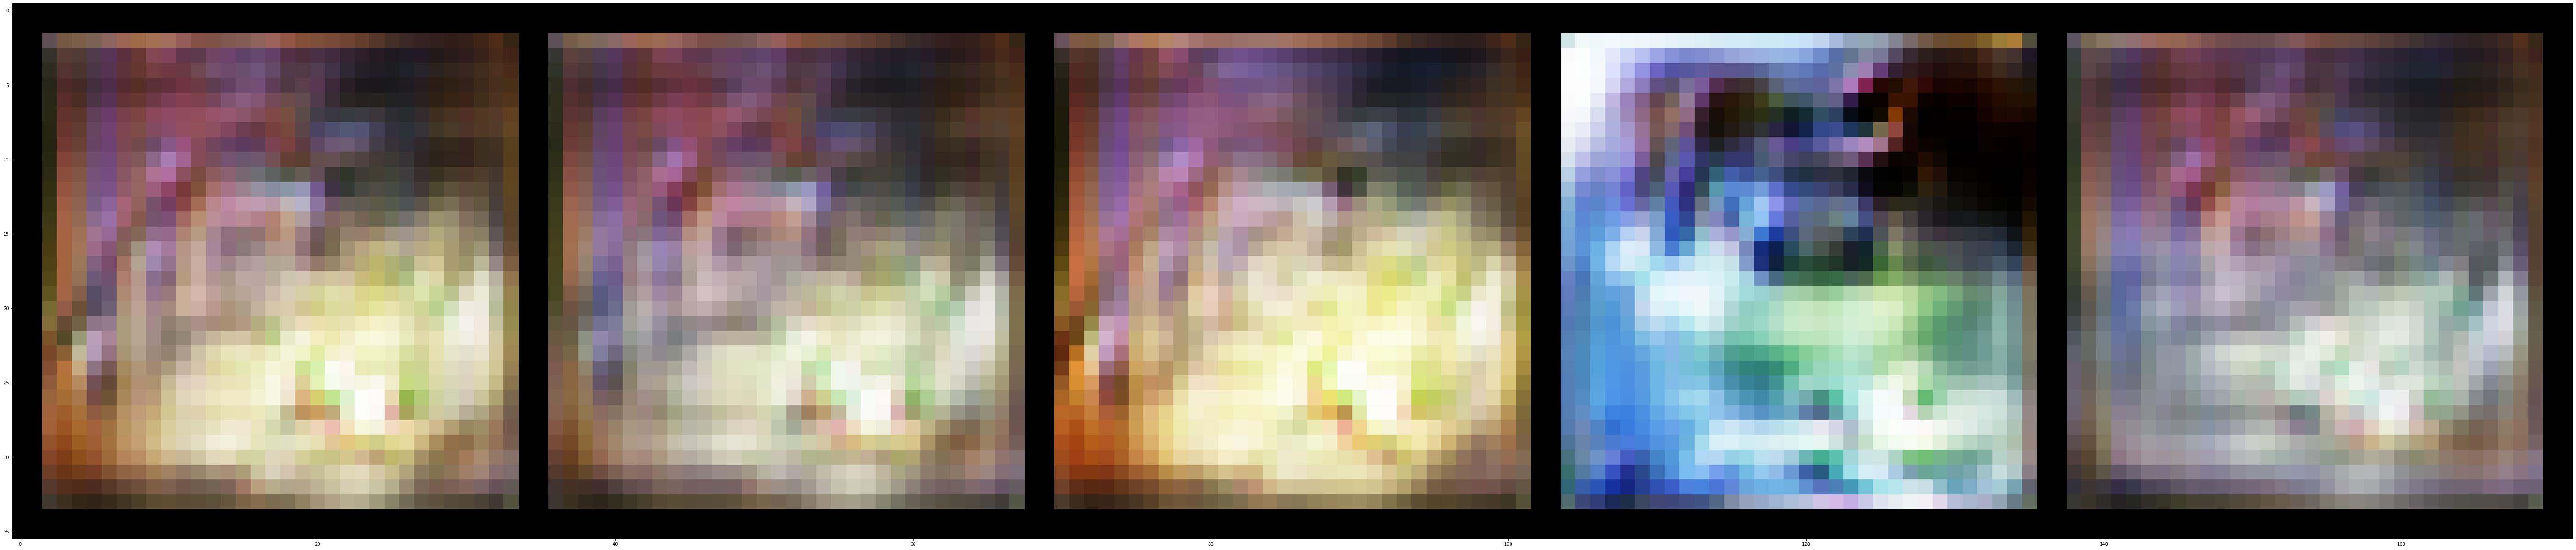

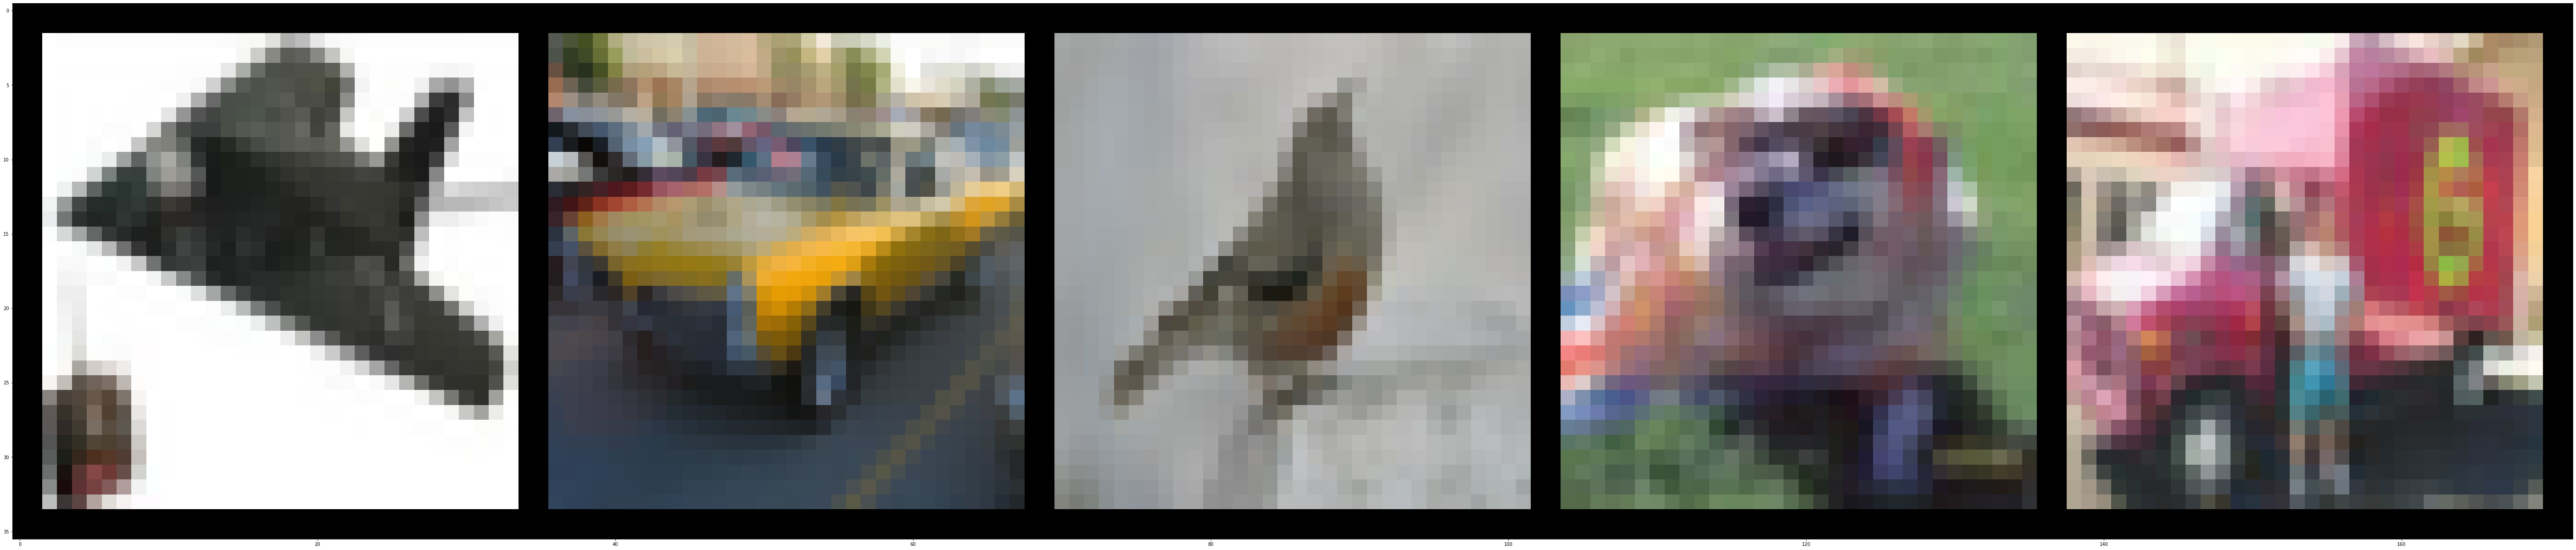

Epoch 17 finished
0.4454318583011627 loss for discriminator
0.38378170132637024 loss for generator
Epoch 18 finished
0.5436410903930664 loss for discriminator
0.27143368124961853 loss for generator
Epoch 19 finished
0.4929172098636627 loss for discriminator
0.32358282804489136 loss for generator
Epoch 20 finished
0.37962841987609863 loss for discriminator
0.3261112868785858 loss for generator
Epoch 21 finished
0.45505350828170776 loss for discriminator
0.344420850276947 loss for generator


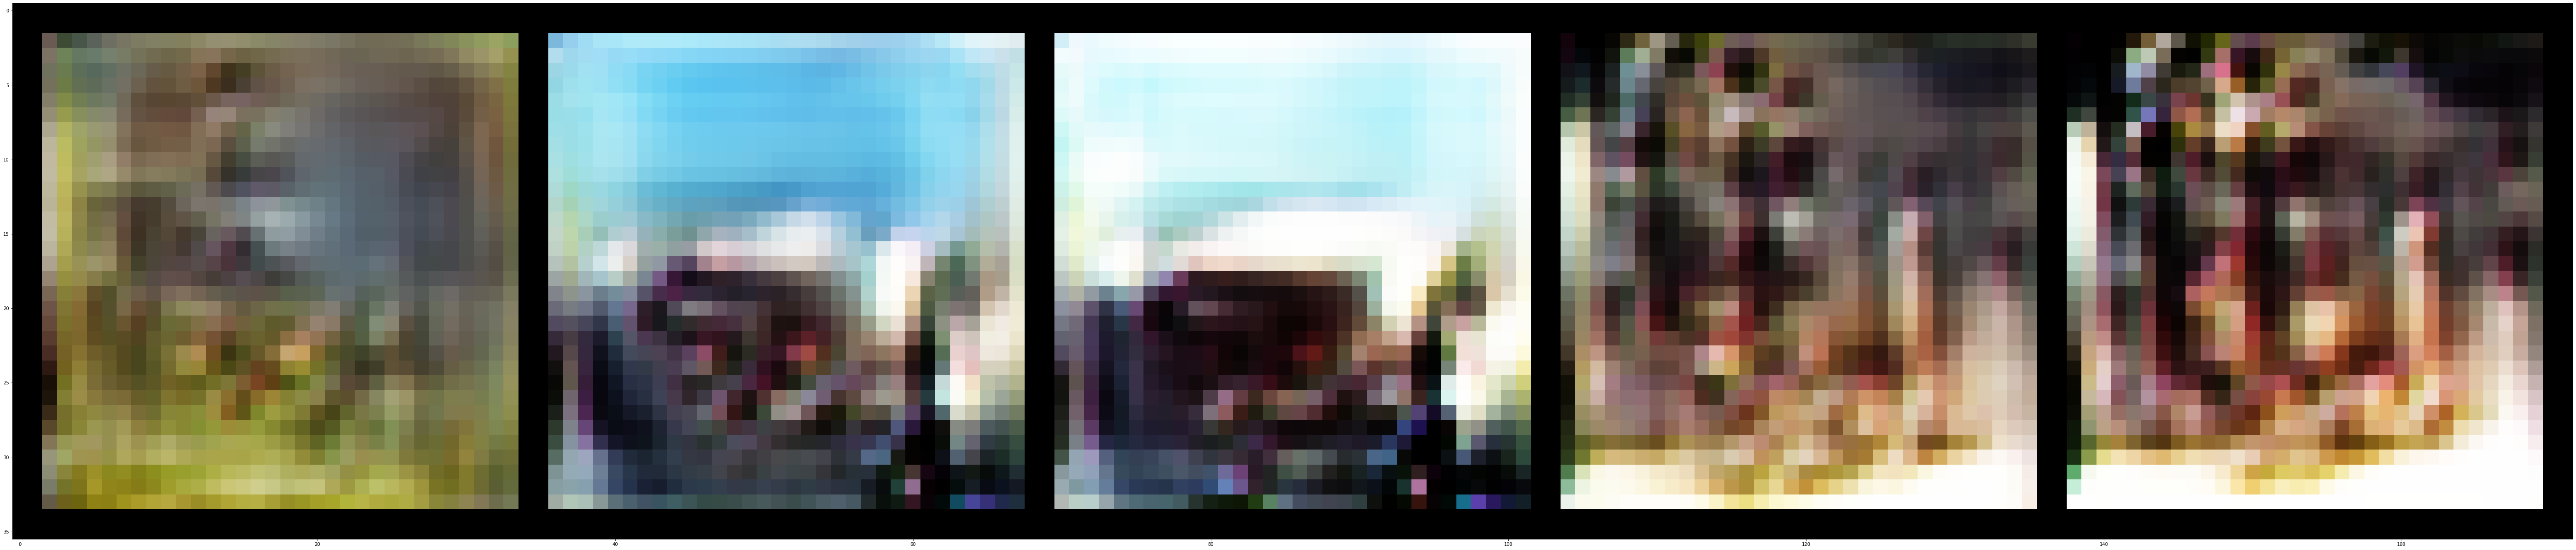

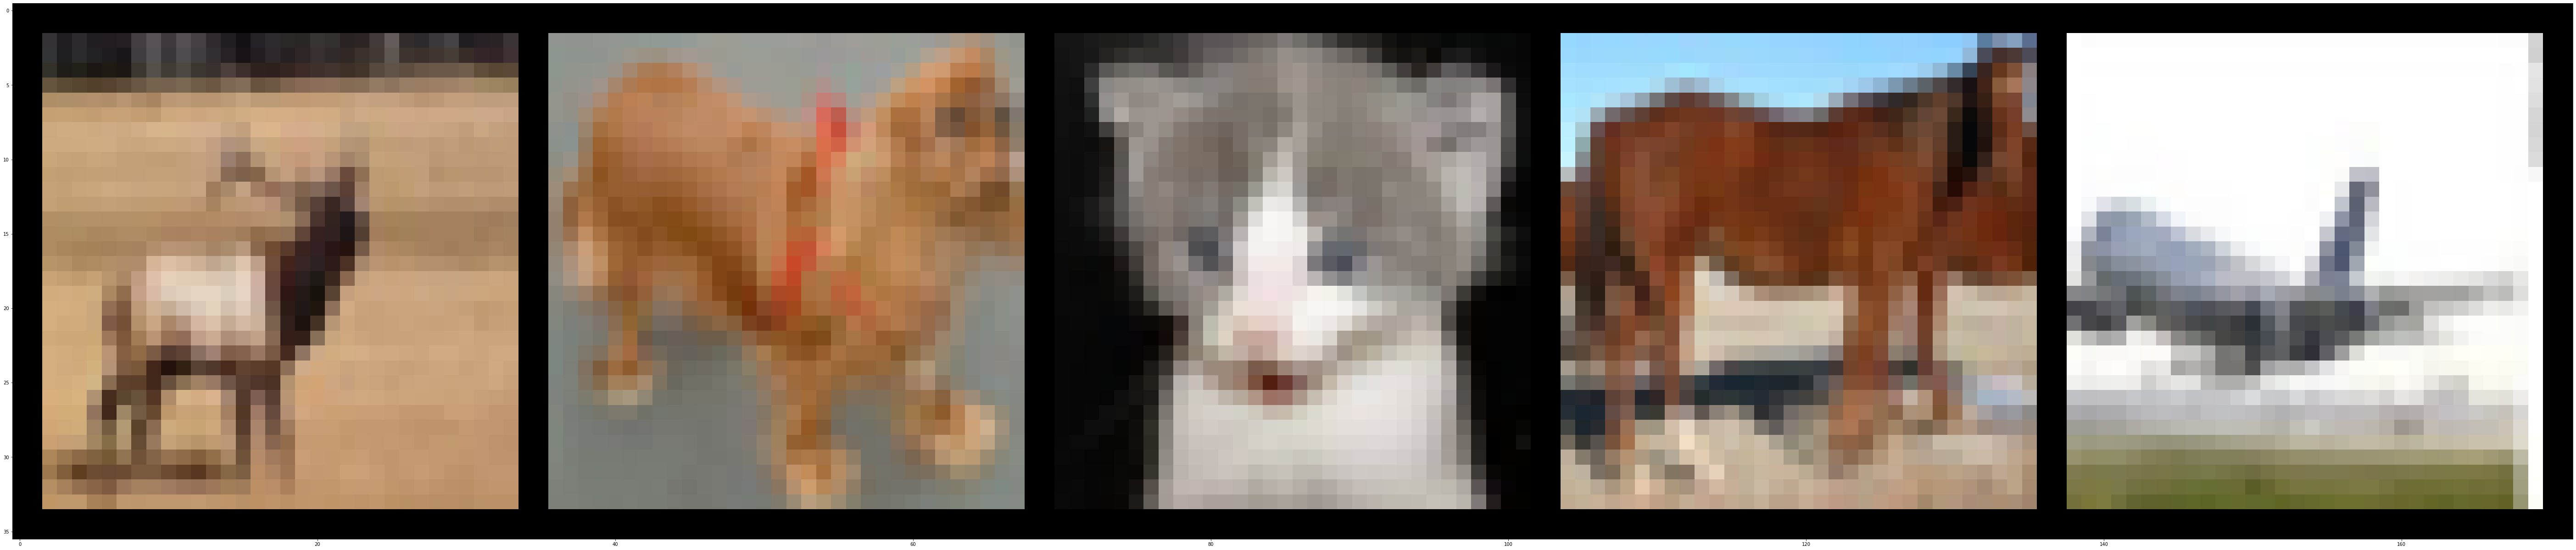

Epoch 22 finished
0.5051514506340027 loss for discriminator
0.33205434679985046 loss for generator
Epoch 23 finished
0.47179579734802246 loss for discriminator
0.270794540643692 loss for generator
Epoch 24 finished
0.5099605917930603 loss for discriminator
0.2529340088367462 loss for generator
Epoch 25 finished
0.44058576226234436 loss for discriminator
0.2519853711128235 loss for generator
Epoch 26 finished
0.46427085995674133 loss for discriminator
0.2893673777580261 loss for generator


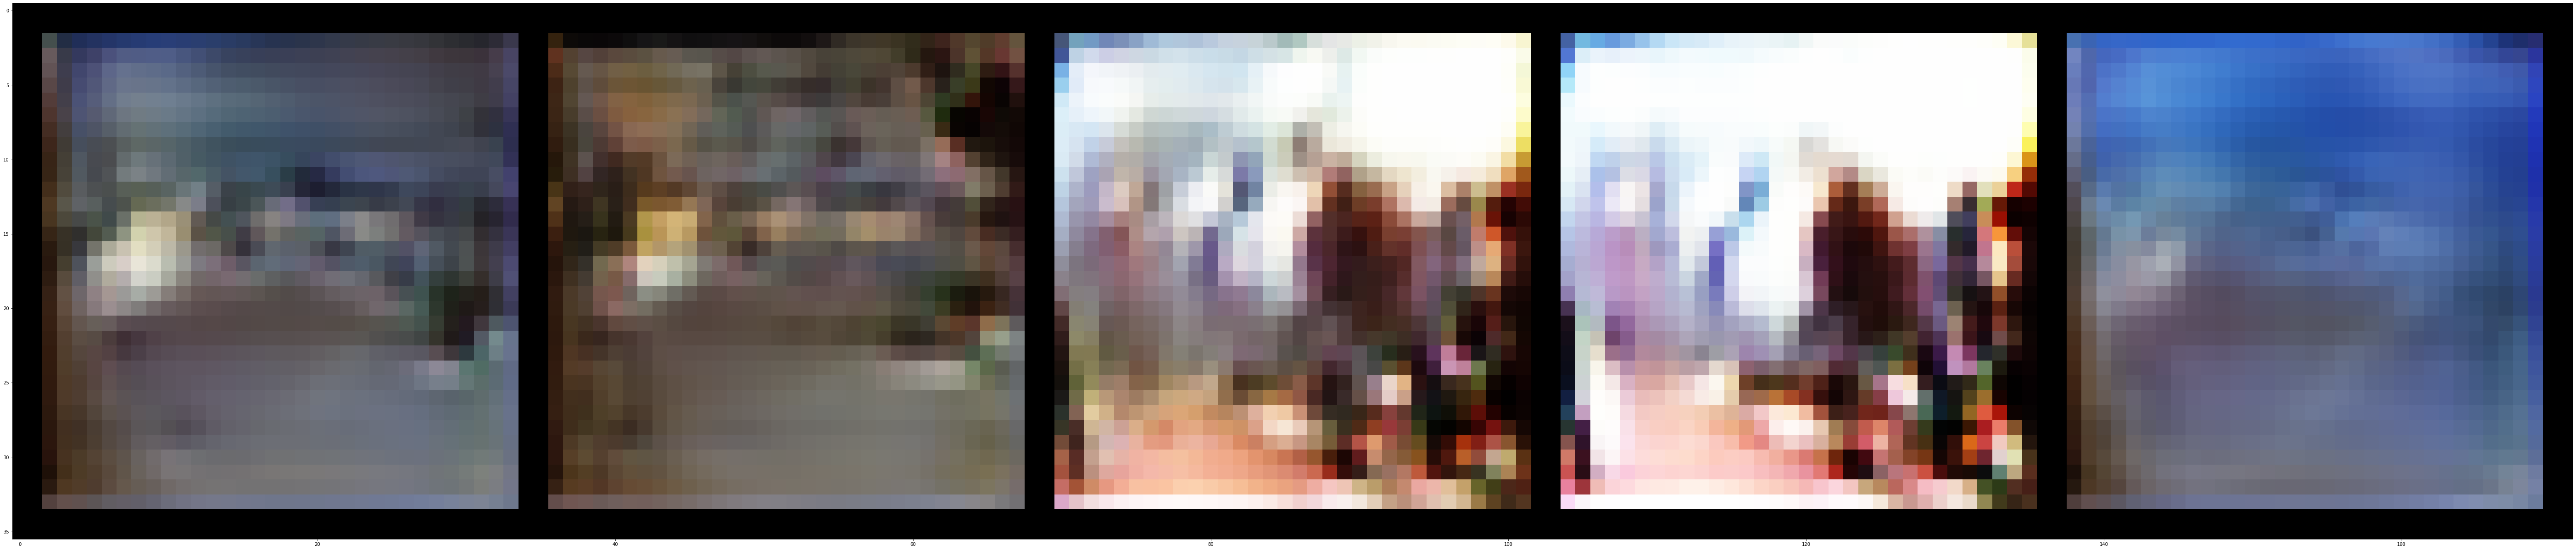

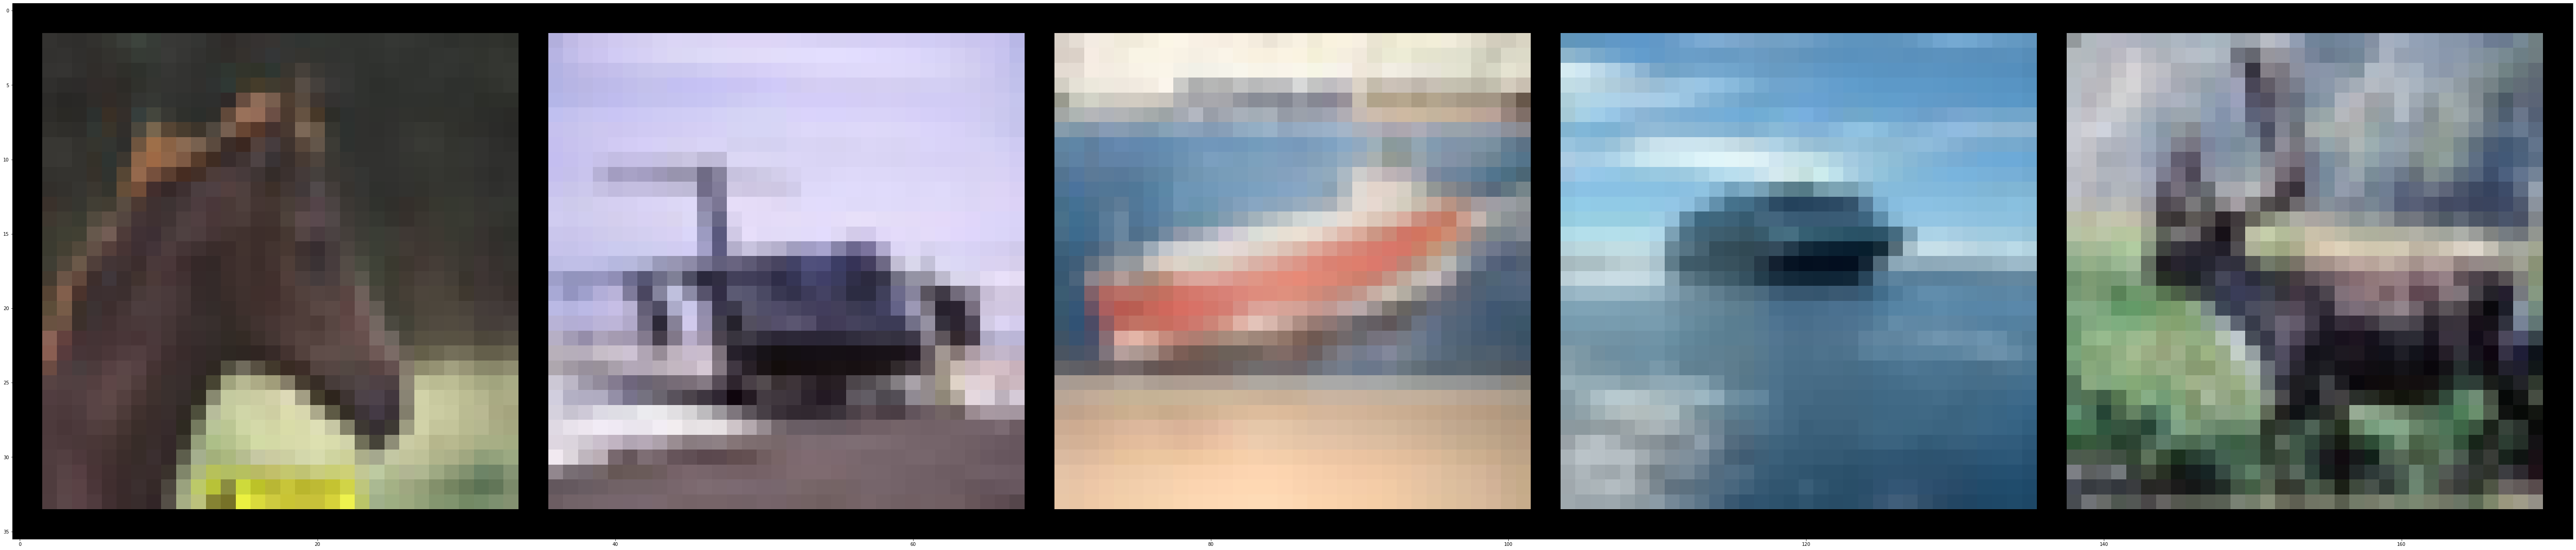

Epoch 27 finished
0.5143142938613892 loss for discriminator
0.24713259935379028 loss for generator
Epoch 28 finished
0.4655333161354065 loss for discriminator
0.35400721430778503 loss for generator
Epoch 29 finished
0.48532840609550476 loss for discriminator
0.29536283016204834 loss for generator
Epoch 30 finished
0.5117775797843933 loss for discriminator
0.2655712962150574 loss for generator
Epoch 31 finished
0.4290894865989685 loss for discriminator
0.3198007643222809 loss for generator


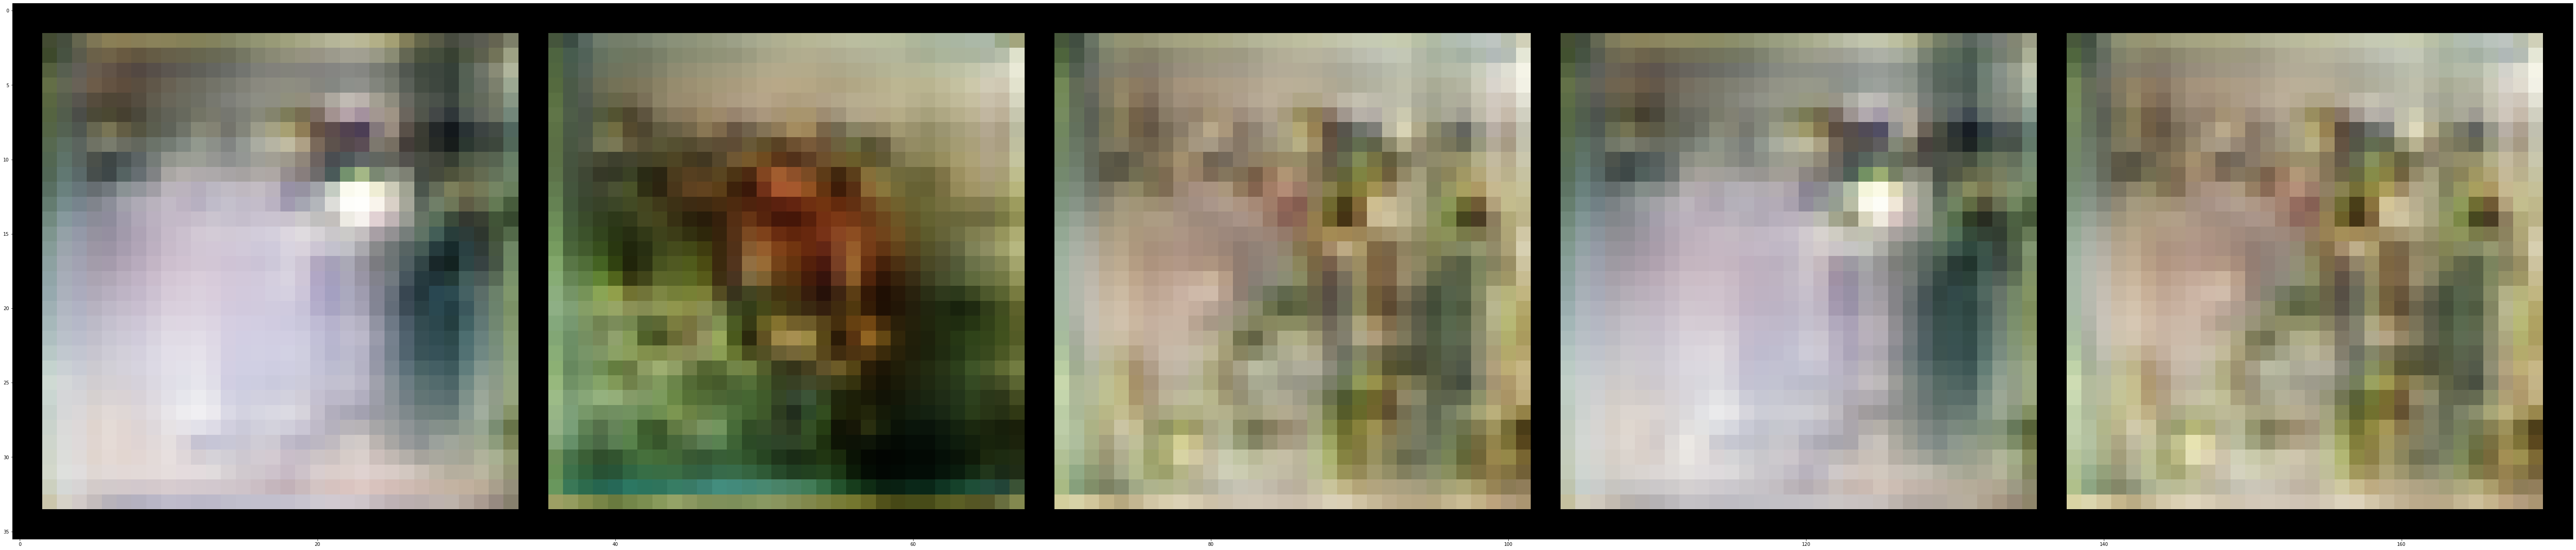

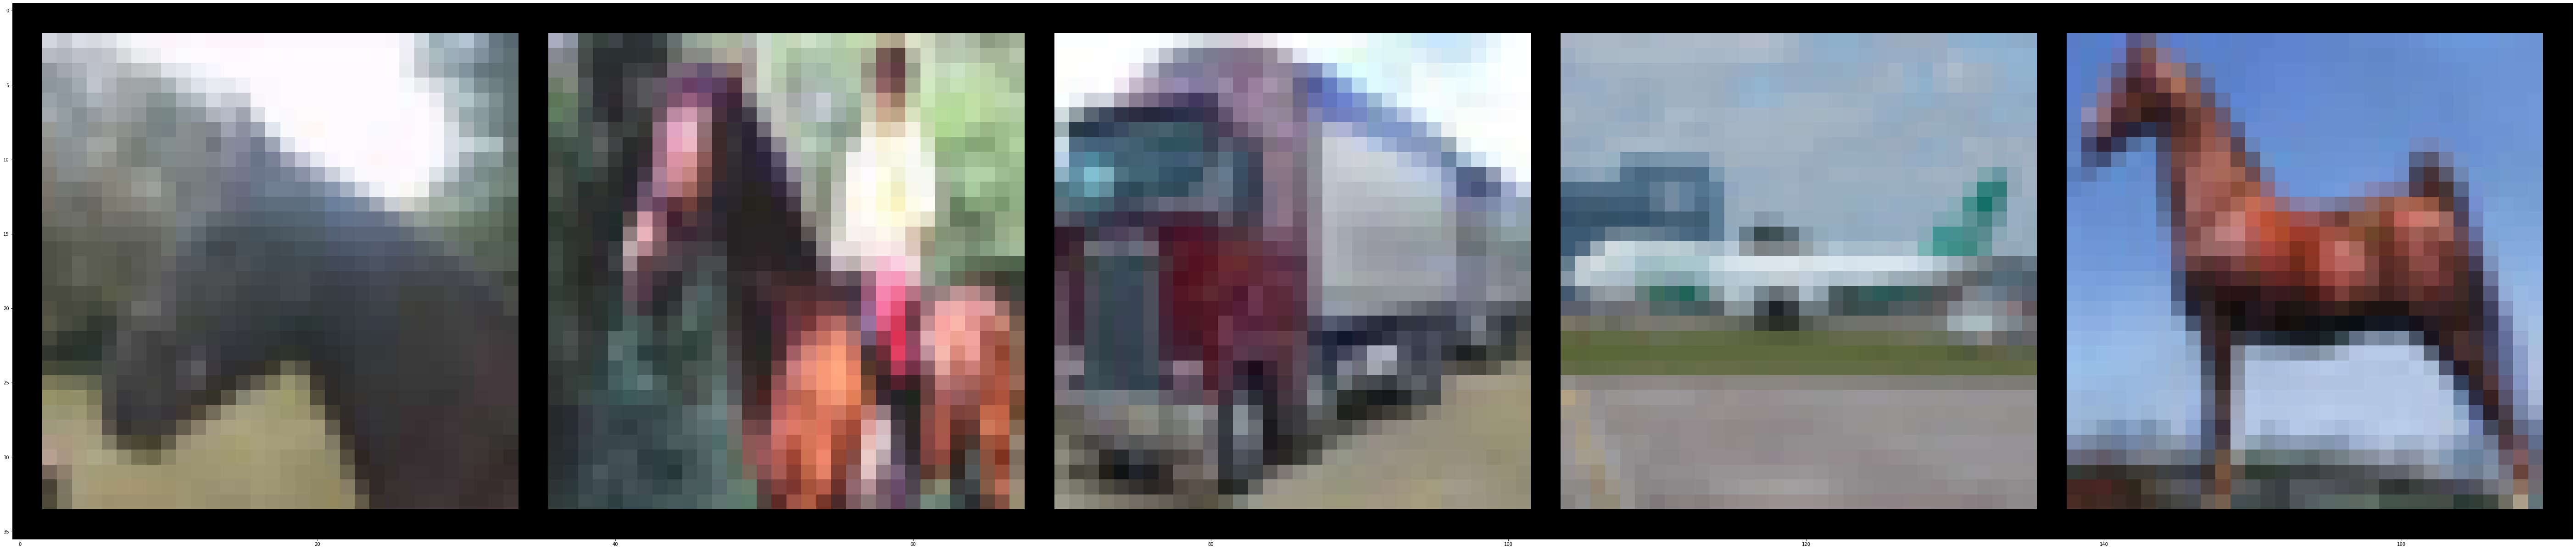

Epoch 32 finished
0.47687095403671265 loss for discriminator
0.2834760844707489 loss for generator
Epoch 33 finished
0.5364810824394226 loss for discriminator
0.21769408881664276 loss for generator
Epoch 34 finished
0.44374507665634155 loss for discriminator
0.26417940855026245 loss for generator
Epoch 35 finished
0.40610936284065247 loss for discriminator
0.29828786849975586 loss for generator
Epoch 36 finished
0.357491135597229 loss for discriminator
0.3064260482788086 loss for generator


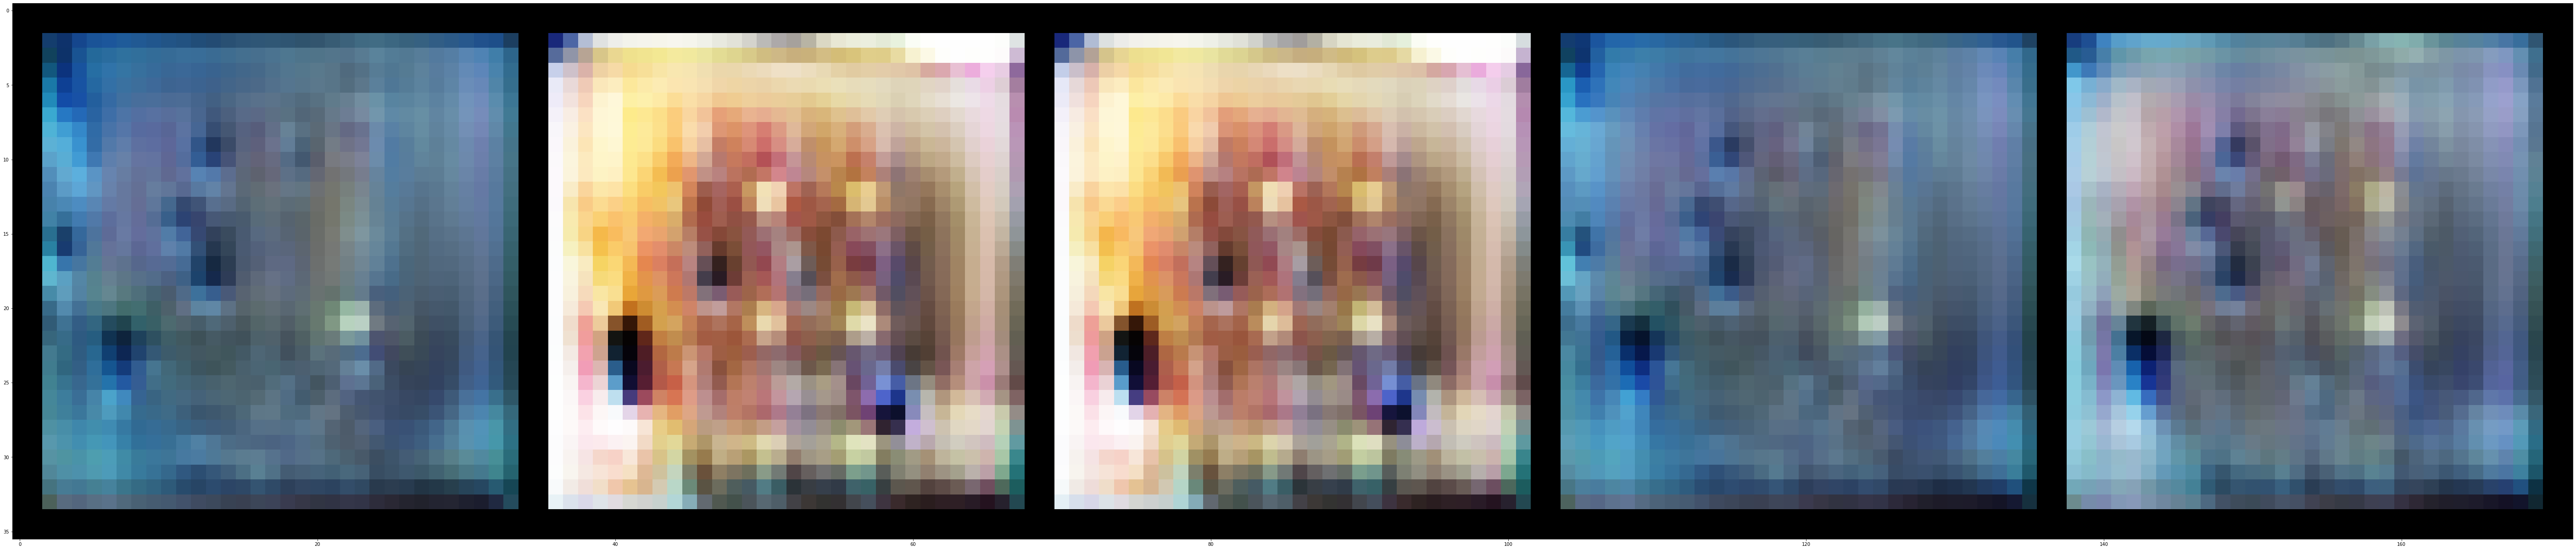

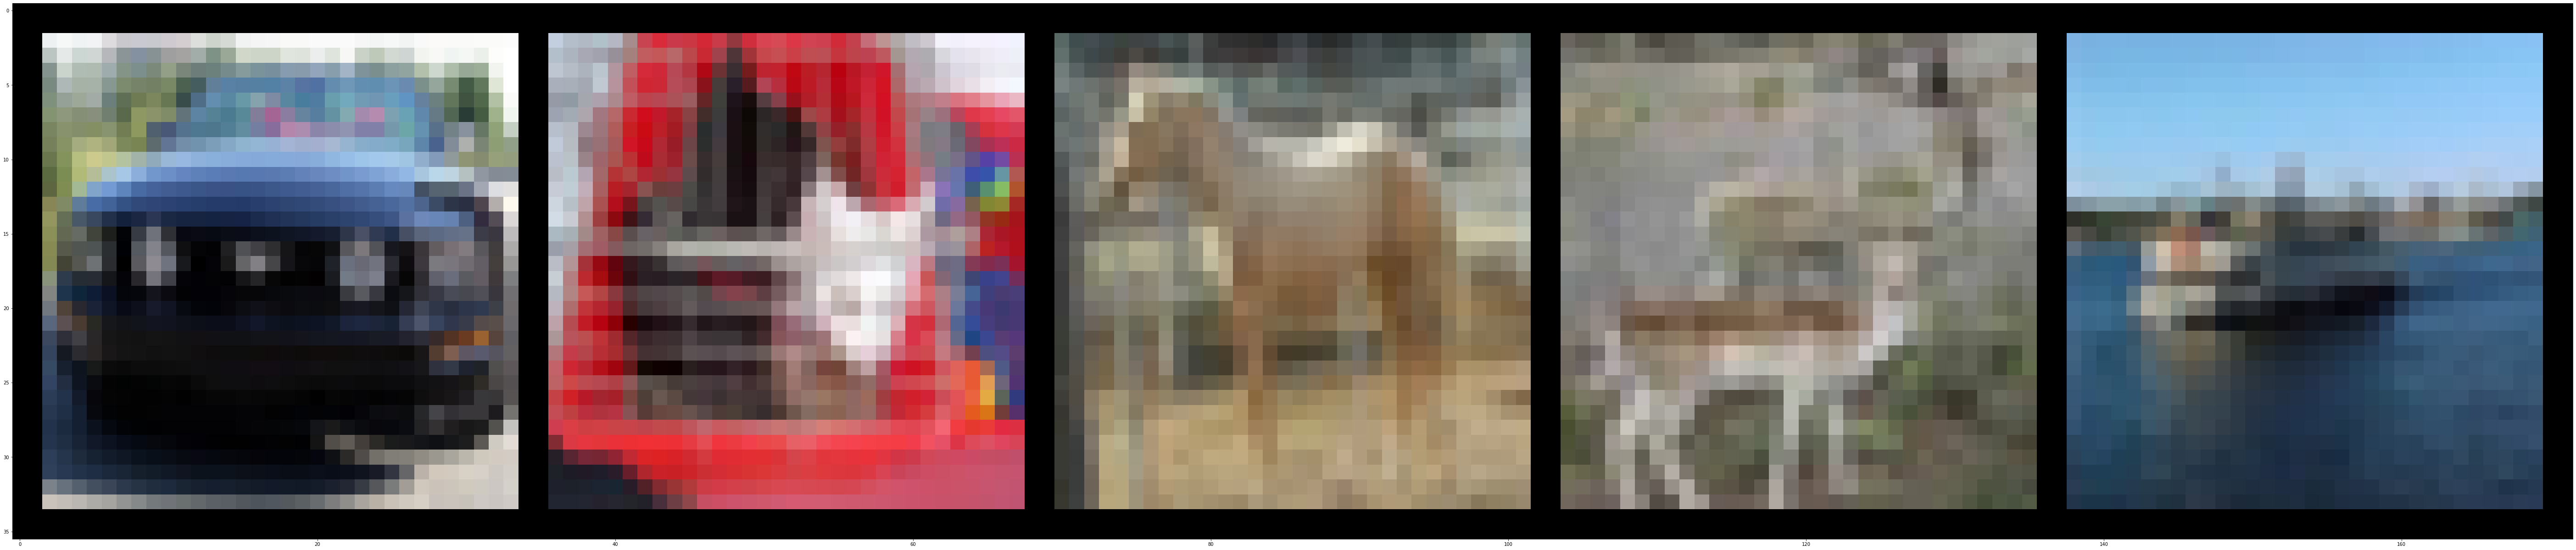

Epoch 37 finished
0.43103334307670593 loss for discriminator
0.3097676932811737 loss for generator
Epoch 38 finished
0.5104055404663086 loss for discriminator
0.30734604597091675 loss for generator
Epoch 39 finished
0.36033952236175537 loss for discriminator
0.2967105507850647 loss for generator
Epoch 40 finished
0.5459492206573486 loss for discriminator
0.24982711672782898 loss for generator
Epoch 41 finished
0.49979907274246216 loss for discriminator
0.2850097715854645 loss for generator


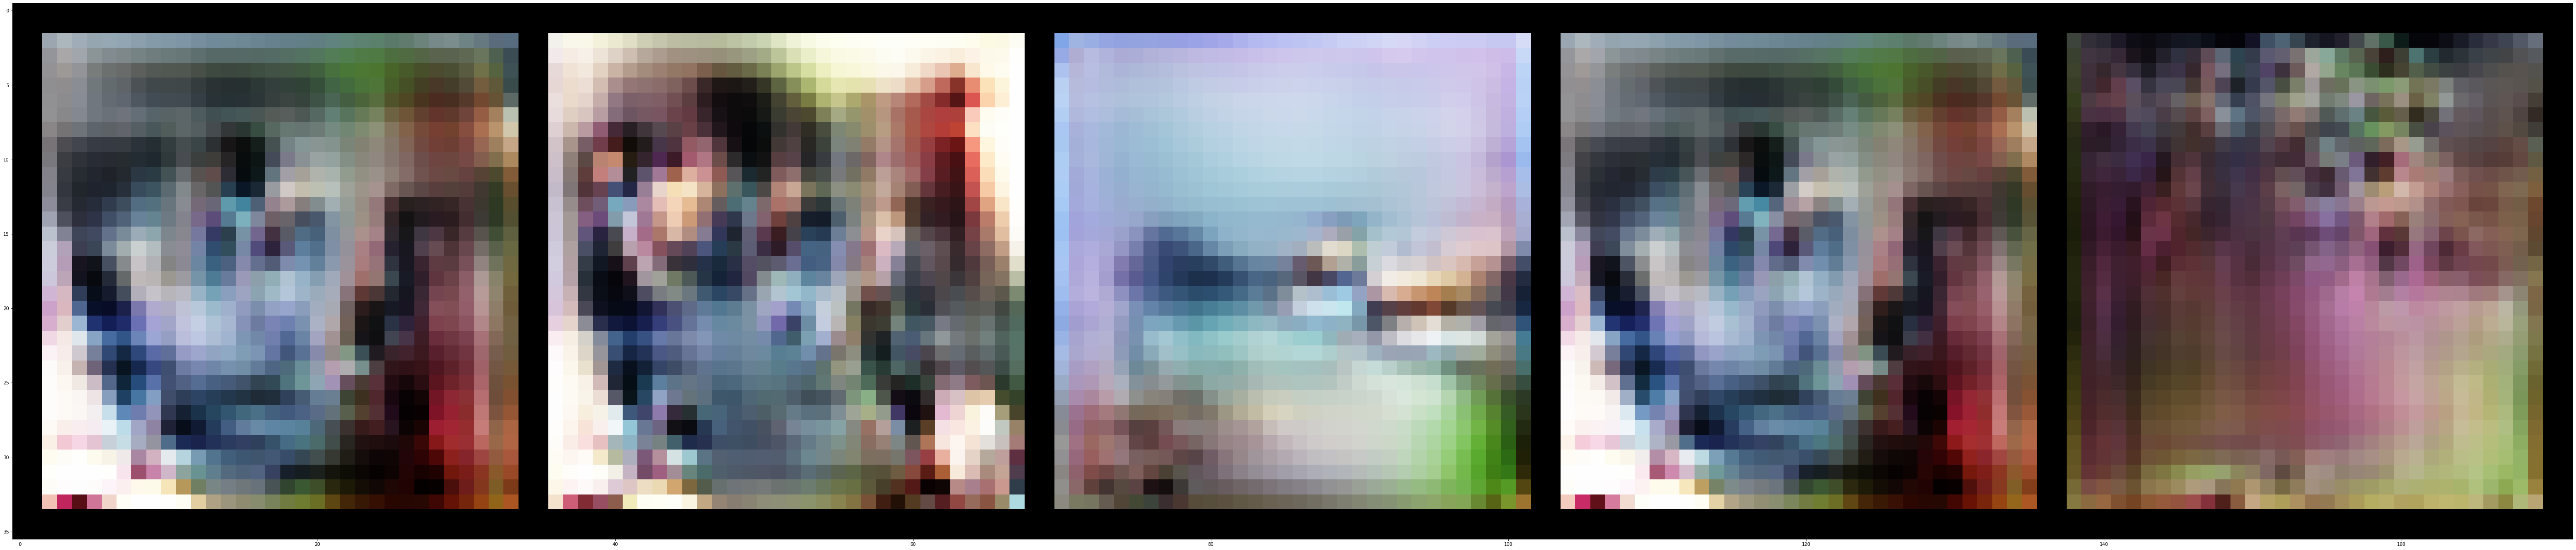

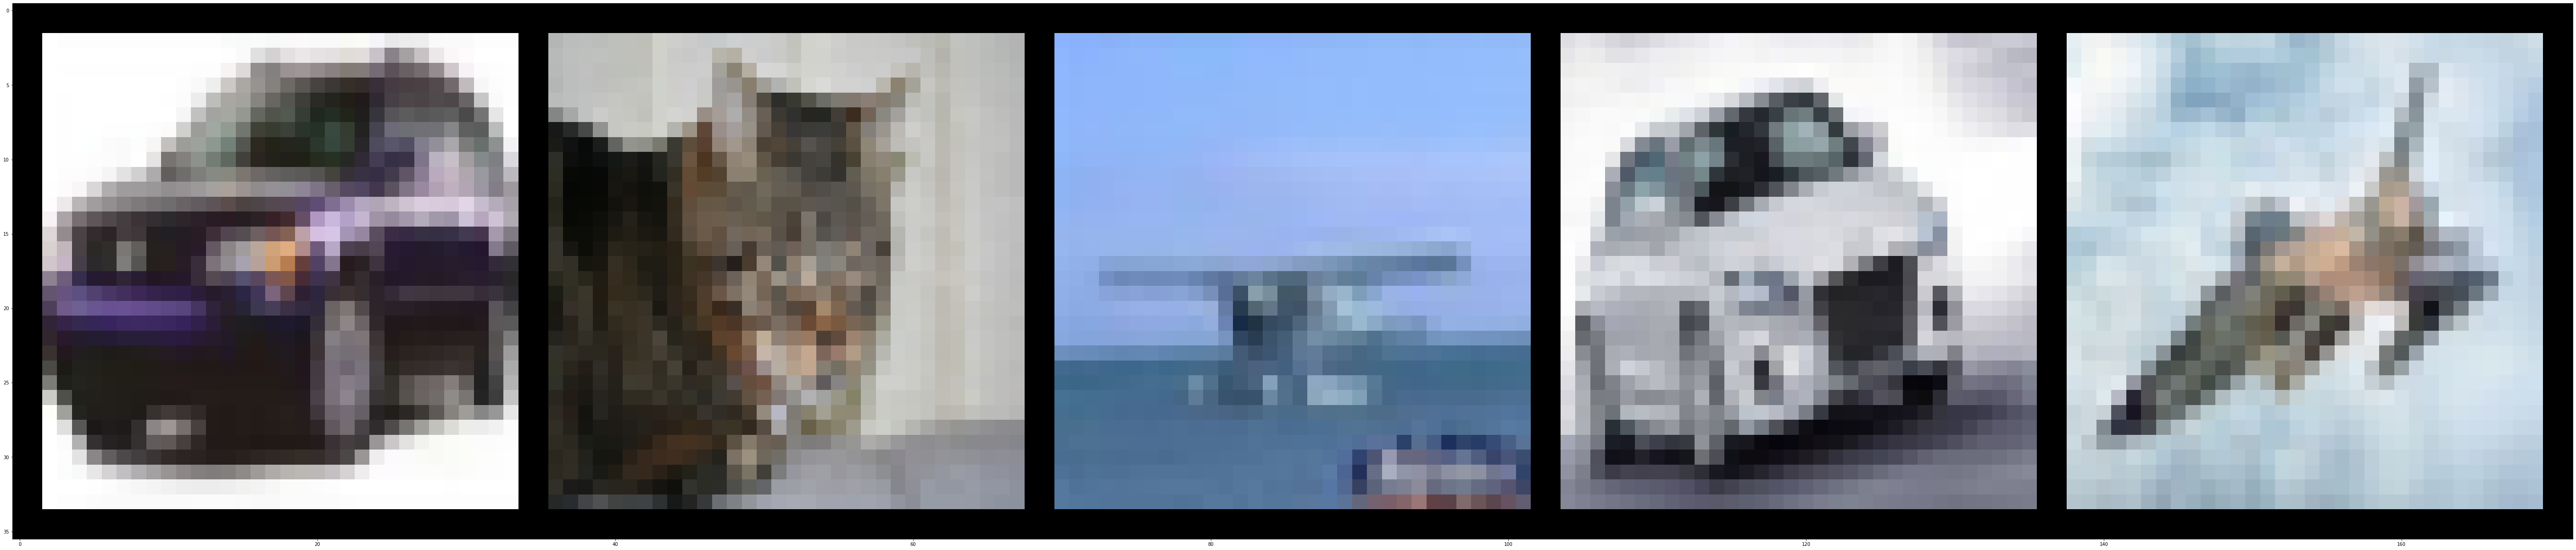

Epoch 42 finished
0.40672188997268677 loss for discriminator
0.38264572620391846 loss for generator
Epoch 43 finished
0.5267844200134277 loss for discriminator
0.2246350795030594 loss for generator
Epoch 44 finished
0.5585636496543884 loss for discriminator
0.259112685918808 loss for generator
Epoch 45 finished
0.41161903738975525 loss for discriminator
0.38289424777030945 loss for generator
Epoch 46 finished
0.36399638652801514 loss for discriminator
0.2683194875717163 loss for generator


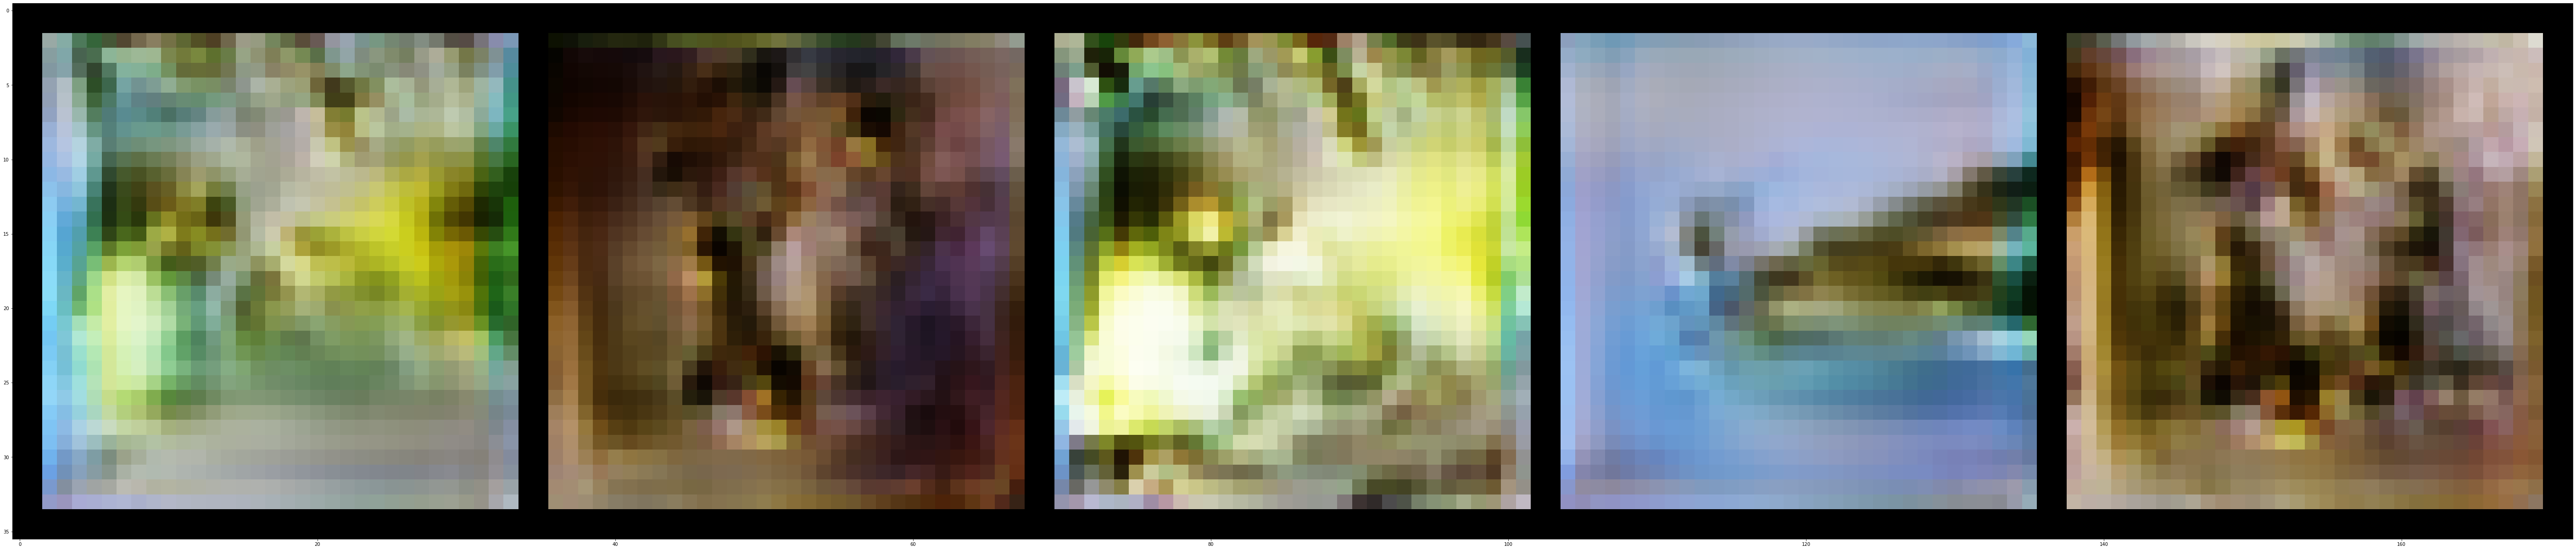

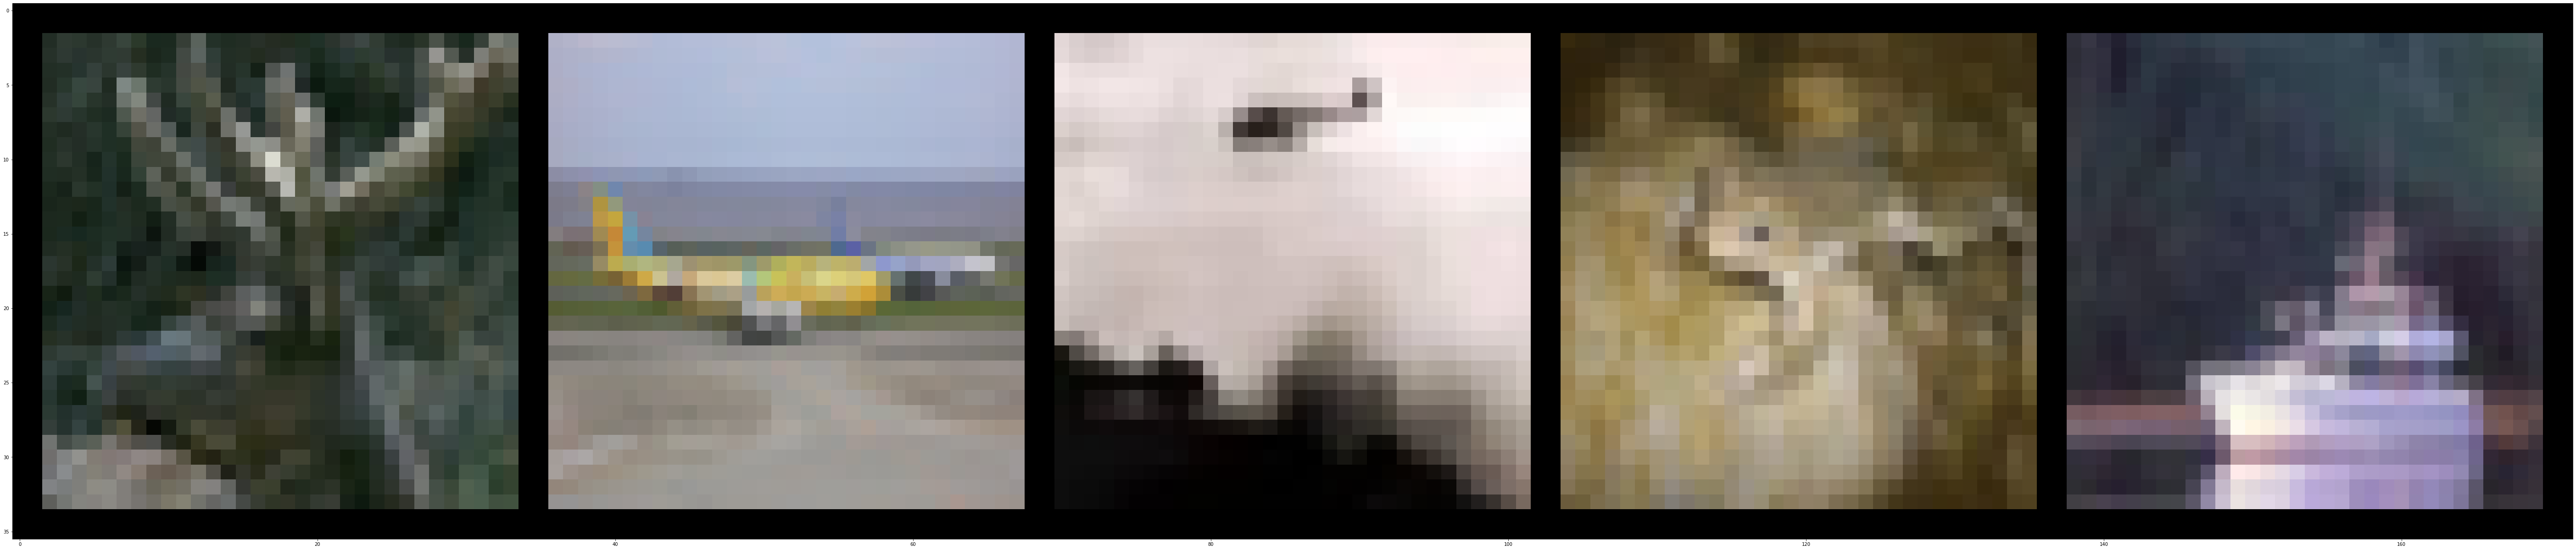

Epoch 47 finished
0.3031783699989319 loss for discriminator
0.437418133020401 loss for generator
Epoch 48 finished
0.43144235014915466 loss for discriminator
0.24838468432426453 loss for generator
Epoch 49 finished
0.5183477997779846 loss for discriminator
0.23249703645706177 loss for generator
Epoch 50 finished
0.5116623044013977 loss for discriminator
0.30046430230140686 loss for generator


In [10]:
loss_generate = []
loss_discriminate = []

for i in range(epochs):
  for index, val in enumerate(traindataloader):
    
    real_image = val[0].to(device)

    #Update Discriminator
    fake_noise = generate_noise(50, device=device)
    fake_cifar = Gen(fake_noise)

    dis_fake = Dis(fake_cifar)
    dis_real = Dis(real_image)

    loss_r = mse(dis_real, torch.ones_like(dis_real))
    loss_f = mse(dis_fake, torch.zeros_like(dis_fake))

    loss_d = loss_r + loss_f

    loss_generate.append(loss_d.item())
    optimD.zero_grad()
    loss_d.backward()
    optimD.step()

    #Update Generator
    fake_noise_new = generate_noise(50, device=device)
    fake_cifar_new = Gen(fake_noise_new)
    fake_dis = Dis(fake_cifar_new)

    loss_g = mse(fake_dis, torch.ones_like(fake_dis))

    loss_discriminate.append(loss_g.item())
    optimG.zero_grad()
    loss_g.backward()
    optimG.step()
  
  print('Epoch {} finished'.format(i + 1))
  print(loss_d.item(), 'loss for discriminator')
  print(loss_g.item(), 'loss for generator')
  if i % 5 == 0:
    display_block_img(fake_cifar_new)
    display_block_img(real_image)

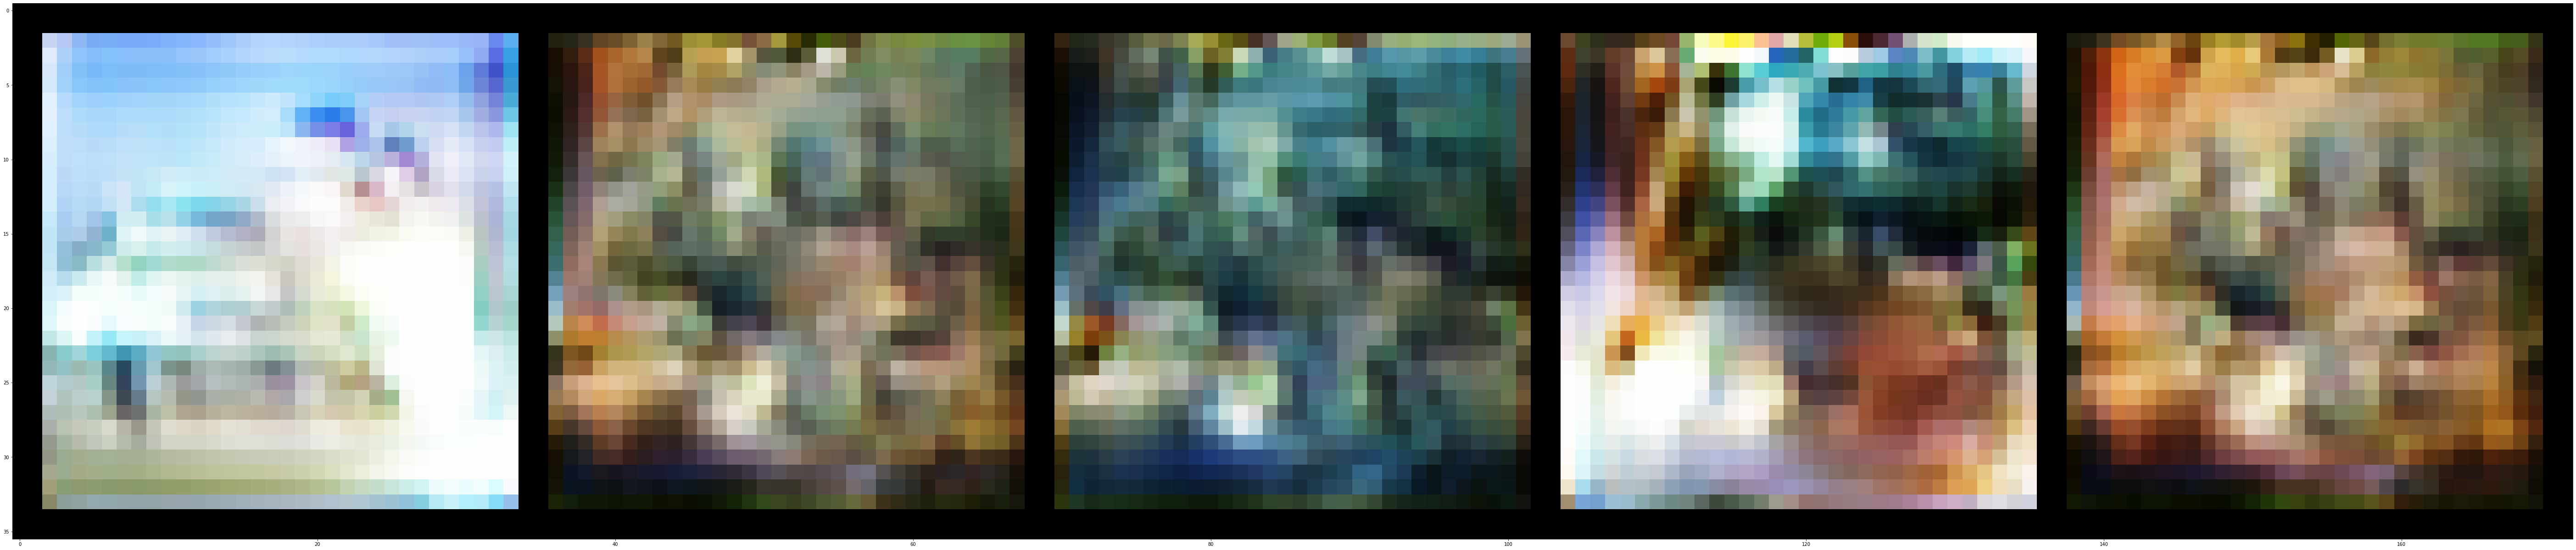

In [11]:
random_noise = torch.rand(5, 26, 1, 1).to(device)
out = Gen(random_noise)
display_block_img(out)

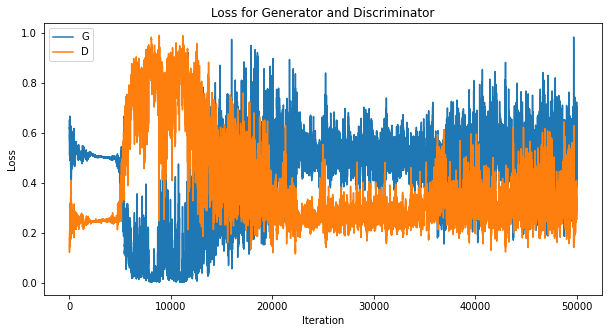

In [12]:
plt.figure(figsize=(10,5))
plt.title('Loss for Generator and Discriminator')
plt.plot(loss_generate, label="G")
plt.plot(loss_discriminate, label="D")
plt.xlabel("Iteration")
plt.ylabel("Loss")
plt.legend()
plt.show()
